The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

**Keras Sequential Models**

This is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

For example, the layers can be defined and passed to the Sequential as an array:

```
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])
```

The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.

For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.

**Keras Functional Models**

The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

Source: https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

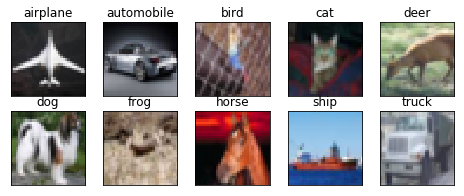

In [13]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [17]:
print(num_classes)

10


In [18]:
#******************* Trying to convert above via Functional API: acc ~ 84 (83.7)% ******************************

import keras
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.regularizers import l2

#Define the model

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

visible = Input(shape=(32, 32, 3))

conv1  = Conv2D(32, (3,3), name= 'conv1')(visible) #30
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.1)(conv1)

conv2  = Conv2D(64, (3,3), padding='same', name= 'conv2')(conv1) #30
conv2  = Activation('relu')(conv2)
conv2  = BatchNormalization()(conv2)
conv2 = Dropout(0.2)(conv2)

conv3  = Conv2D(128, (3,3), padding='same', name= 'conv3')(conv2) #30
conv3  = Activation('relu')(conv3)
conv3  = BatchNormalization()(conv3)

pool1 = MaxPooling2D(pool_size=(2,2), name= 'pool1')(conv3) #15
pool1 = Dropout(0.1)(pool1)

conv4 = Convolution2D(32, (1, 1), activation="relu", name= 'conv4')(pool1) #15

conv5 = Conv2D(32, (3,3), padding='same', name= 'conv5')(conv4) #15
conv5 = Activation('relu')(conv5)
conv5 = BatchNormalization()(conv5)
conv5 = Dropout(0.2)(conv5)

conv6 = Conv2D(64, (3,3), padding='same', name= 'conv6')(conv5) #15
conv6 = Activation('relu')(conv6)
conv6 = BatchNormalization()(conv6)
conv6 = Dropout(0.1)(conv6) 

conv7 = Conv2D(128, (3,3), padding='same', name= 'conv7')(conv6) #15
conv7 = Activation('relu')(conv7)
conv7 = BatchNormalization()(conv7)

pool2 = MaxPooling2D(pool_size=(2,2), name= 'pool2')(conv7) #7
pool2 = Dropout(0.1)(pool2) 

conv8 = Convolution2D(64, (1, 1), activation="relu", name= 'conv8')(pool2) #7

conv9 = Conv2D(64, (3,3), padding='same', name= 'conv9')(conv8) #7
conv9 = Activation('relu')(conv9)
conv9 = BatchNormalization()(conv9)
conv9 = Dropout(0.2)(conv9)

conv10 = Conv2D(128, (3,3), padding='same', name= 'conv10')(conv9) #7
conv10 = Activation('relu')(conv10)
conv10 = BatchNormalization()(conv10)

conv11 = Conv2D(10, (7,7), name= 'conv11')(conv10) #1

flat = GlobalAveragePooling2D()(conv11) 
  
#flat = Flatten()(conv11)
output = Activation('softmax')(flat)
model = Model(inputs=visible, outputs=output)
 
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

#summarize layers
print(model.summary())

#plot graph
plot_model(model, to_file='model_plot.jpg', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 64)        0         
__________

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [20]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=781, epochs=100)`


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 27s 35ms/step - loss: 1.9531 - acc: 0.4028 - val_loss: 1.8317 - val_acc: 0.5116

Epoch 00001: val_acc improved from -inf to 0.51160, saving model to /content/drive/My Drive/Colab Notebooks/9. Data Augmentation/6B_model_accuracy_WithCutOut.best.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 25s 33ms/step - loss: 1.3328 - acc: 0.5930 - val_loss: 1.2636 - val_acc: 0.5793

Epoch 00002: val_acc improved from 0.51160 to 0.57930, saving model to /content/drive/My Drive/Colab Notebooks/9. Data Augmentation/6B_model_accuracy_WithCutOut.best.hdf5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 25s 32ms/step - loss: 1.1354 - acc: 0.6360 - val_loss: 1.1739 - val_acc: 0.6321

Epoch 00003: val_acc improved from 0.57930 to 0.6

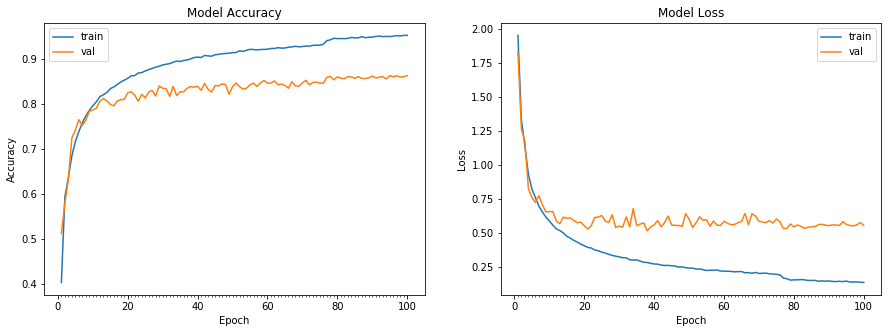

Accuracy on test data is: 86.35


In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

# Accuracy on test data is: 83.88
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Accuracy on test data is: 83.48
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

# filepath="model_accuracy.best.hdf5"

filepath='/content/drive/My Drive/Colab Notebooks/9. Data Augmentation/6B_model_accuracy_WithCutOut.best.hdf5'

reduce_LR = LearningRateScheduler(lr_schedule, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                callbacks=[reduce_LR, checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))